# Python Pandas Tutorial

Pandas is built on top of the NumPy package, meaning a lot of the structure of NumPy is used or replicated in Pandas.

Data in pandas is often used to feed statistical analysis in SciPy, plotting functions from Matplotlib, and machine learning algorithms in Scikit-learn.

Ref: https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/

In [126]:
# If your Jupyter environment does NOT have pandas installed
# you can run the below command after un-commenting the line

# !pip install pandas

'''
Alternatively, you can always use Anaconda Prompt and run either of the below:

conda install pandas

OR

pip install pandas
'''

'\nAlternatively, you can always use Anaconda Prompt and run either of the below:\n\nconda install pandas\n\nOR\n\npip install pandas\n'

In [127]:
import pandas as pd

# Core components of pandas: Series and DataFrames

The primary two components of pandas are the Series and DataFrame

A Series is essentially a column, and a DataFrame is a multi-dimensional table made up of a collection of Series.

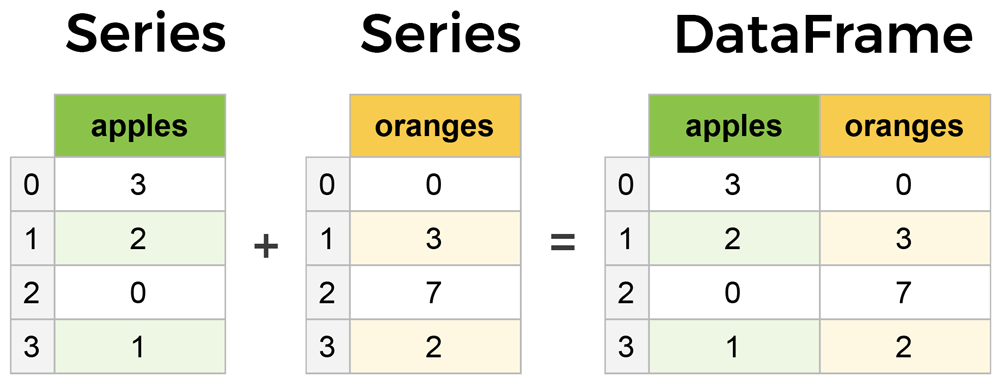

In [128]:
'''
Creating DataFrames from scratch
'''

# Let's store data in a dictionary
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

# Let's now convert this into a Pandas data frame
# Each (key, value) item in data corresponds to a column in the resulting DataFrame.

purchases = pd.DataFrame(data)

purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [129]:
'''
We can retrieve an order by using the index number:
'''
purchases.iloc[2]

apples     0
oranges    7
Name: 2, dtype: int64

In [130]:
'''
Let's have customer names as our index:
'''
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])

purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


In [131]:
'''
Now, we can locate a customer's order by using their name:
'''
purchases.loc['June']

apples     3
oranges    0
Name: June, dtype: int64

In [132]:
# Read from a CSV file and convert into a Pandas data frame
input_file = 'members.csv'
members = pd.read_csv(input_file)

# members is a Pandas data frame
members

,member_id,name,age,gender,income
0,123,John Denver,20,M,1000
1,456,Britney Spears,30,F,2500
2,789,Katrina Kaif,40,F,3400
3,285,Laura Pausini,50,F,4500
4,589,Hermann Hesse,60,M,5600
5,663,John Wayne,70,M,6700
6,923,Saylor Twift,80,F,10000
7,230,Tustin Jimberlake,90,M,20000
8,999,Cillary Hlinton,100,F,30000


In [133]:
'''
CSVs don't have indexes like our DataFrames, so all we need to do is just designate the index_col when reading.
As a result, the 1st (left most) column in the CSV file becomes the index.

Other options are:

skiprows=1  --> skips the 1st row
sep='\t'   --> uses "tab" as the delimiter instead of "comma"
usecols=['col1', 'col2']  --> You can select only certain columns for conversion
header=None  --> in case of no header row in CSV file
index_col='member_id'  --> use 'member_id' column as index
index_col=0  --> same effect as the above (use the left most column as index)

'''
# Read from a CSV file and convert into a Pandas data frame
members = pd.read_csv(input_file, index_col=0)

# members is a Pandas data frame
members

,name,age,gender,income
member_id,,,,
123,John Denver,20,M,1000
456,Britney Spears,30,F,2500
789,Katrina Kaif,40,F,3400
285,Laura Pausini,50,F,4500
589,Hermann Hesse,60,M,5600
663,John Wayne,70,M,6700
923,Saylor Twift,80,F,10000
230,Tustin Jimberlake,90,M,20000
999,Cillary Hlinton,100,F,30000


In [134]:
'''
Now, we can locate a member's details by using their member_id
'''
members.loc[589]

name      Hermann Hesse
age                  60
gender                M
income             5600
Name: 589, dtype: object

In [135]:
'''
Read from a JSON file
'''
products = pd.read_json('products.json')

products

,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010
name,avacado,lotion,pain reliever,dry pasta,toothbrush,halloween candy,mascara,capsicum,blush,granola bars
price,230,250,500,20,700,33,765,764,87,24
category,grocery,beauty & personal,health,grocery,beauty & personal,grocery,beauty & personal,grocery,beauty & personal,grocery
quantity,10,100,200,50,100,56,70,90,50,60
date,10/03/2021,15/07/2021,12/04/2021,27/06/2021,30/01/2021,22/02/2021,11/03/2021,16/02/2021,17/07/2021,20/05/2021


In [136]:
'''
Pandas will try to figure out how to create a DataFrame by analyzing structure of your JSON,
and sometimes it doesn't get it right.

Often you'll need to set the orient keyword argument depending on the structure.

In this case, we want each row to be a unique product (identified by 1001, 1002.... product id)
Hence, we set orient='index'
'''
products = pd.read_json('products.json', orient='index')

products

,name,price,category,quantity,date
1001,avacado,230,grocery,10,2021-10-03
1002,lotion,250,beauty & personal,100,2021-07-15
1003,pain reliever,500,health,200,2021-12-04
1004,dry pasta,20,grocery,50,2021-06-27
1005,toothbrush,700,beauty & personal,100,2021-01-30
1006,halloween candy,33,grocery,56,2021-02-22
1007,mascara,765,beauty & personal,70,2021-11-03
1008,capsicum,764,grocery,90,2021-02-16
1009,blush,87,beauty & personal,50,2021-07-17
1010,granola bars,24,grocery,60,2021-05-20


In [137]:
'''
Let's name the 1st column
'''
products.index.name = 'product_id'

print(products.index.name)

products

# We can now search a product by unique product_id

products.loc[1008]

product_id


name                   capsicum
price                       764
category                grocery
quantity                     90
date        2021-02-16 00:00:00
Name: 1008, dtype: object

# Most important DataFrame operations
DataFrames possess hundreds of methods and other operations that are crucial to any analysis. As a beginner, you should know the operations that perform simple transformations of your data and those that provide fundamental statistical analysis.

In [138]:
'''
Let's use 'members' data frame we generated previously
'''
members

,name,age,gender,income
member_id,,,,
123,John Denver,20,M,1000
456,Britney Spears,30,F,2500
789,Katrina Kaif,40,F,3400
285,Laura Pausini,50,F,4500
589,Hermann Hesse,60,M,5600
663,John Wayne,70,M,6700
923,Saylor Twift,80,F,10000
230,Tustin Jimberlake,90,M,20000
999,Cillary Hlinton,100,F,30000


In [139]:
'''
Viewing your data

The first thing to do when opening a new dataset is print out a few rows to keep
as a visual reference. We accomplish this with .head().
'''
members.head()

,name,age,gender,income
member_id,,,,
123,John Denver,20,M,1000
456,Britney Spears,30,F,2500
789,Katrina Kaif,40,F,3400
285,Laura Pausini,50,F,4500
589,Hermann Hesse,60,M,5600


In [140]:
'''
.head() outputs the first 5 rows of your DataFrame by default

We could also pass a number as well to show, say, the first 7 rows
'''
members.head(7)

,name,age,gender,income
member_id,,,,
123,John Denver,20,M,1000
456,Britney Spears,30,F,2500
789,Katrina Kaif,40,F,3400
285,Laura Pausini,50,F,4500
589,Hermann Hesse,60,M,5600
663,John Wayne,70,M,6700
923,Saylor Twift,80,F,10000


In [141]:
'''
To see the last five rows use .tail()

tail() also accepts a number, and in this case we printing the bottom 3 rows:
'''
members.tail(3)

,name,age,gender,income
member_id,,,,
923,Saylor Twift,80,F,10000
230,Tustin Jimberlake,90,M,20000
999,Cillary Hlinton,100,F,30000


# Getting info about your data
.info() should be one of the very first commands you run after loading your data.

.info() provides the essential details about your dataset, such as the number of rows and columns, the number of non-null values, what type of data is in each column, and how much memory your DataFrame is using.

In [142]:
members.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 123 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    9 non-null      object
 1   age     9 non-null      int64 
 2   gender  9 non-null      object
 3   income  9 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 660.0+ bytes


In [143]:
'''
Another fast and useful attribute is .shape, which outputs just a tuple of (rows, columns):
'''
members.shape

# 8 rows, 4 columns in 'members' data frame

(9, 4)

# Handling duplicates
This dataset does not have duplicate rows, but it is always important to verify you aren't aggregating duplicate rows.

In [144]:
# Let's create another data frame and CREATE duplicates
temp_members = members.append(members)

temp_members.shape

temp_members

,name,age,gender,income
member_id,,,,
123,John Denver,20,M,1000
456,Britney Spears,30,F,2500
789,Katrina Kaif,40,F,3400
285,Laura Pausini,50,F,4500
589,Hermann Hesse,60,M,5600
663,John Wayne,70,M,6700
923,Saylor Twift,80,F,10000
230,Tustin Jimberlake,90,M,20000
999,Cillary Hlinton,100,F,30000


In [145]:
# Now we can try dropping duplicates:

temp_members = temp_members.drop_duplicates()

temp_members.shape

temp_members

,name,age,gender,income
member_id,,,,
123,John Denver,20,M,1000
456,Britney Spears,30,F,2500
789,Katrina Kaif,40,F,3400
285,Laura Pausini,50,F,4500
589,Hermann Hesse,60,M,5600
663,John Wayne,70,M,6700
923,Saylor Twift,80,F,10000
230,Tustin Jimberlake,90,M,20000
999,Cillary Hlinton,100,F,30000


In [146]:
# Let's re-create another data frame and CREATE duplicates
# to demonstrate the next example
temp_members = members.append(members)
temp_members.shape
temp_members

,name,age,gender,income
member_id,,,,
123,John Denver,20,M,1000
456,Britney Spears,30,F,2500
789,Katrina Kaif,40,F,3400
285,Laura Pausini,50,F,4500
589,Hermann Hesse,60,M,5600
663,John Wayne,70,M,6700
923,Saylor Twift,80,F,10000
230,Tustin Jimberlake,90,M,20000
999,Cillary Hlinton,100,F,30000


In [147]:
'''
It's a little verbose to keep assigning DataFrames to the same variable like in this example.
For this reason, pandas has the inplace keyword argument on many of its methods.

Using inplace=True will modify the DataFrame object in place:
'''
# De-duplicate now
temp_members.drop_duplicates(inplace=True)
temp_members.shape
temp_members

,name,age,gender,income
member_id,,,,
123,John Denver,20,M,1000
456,Britney Spears,30,F,2500
789,Katrina Kaif,40,F,3400
285,Laura Pausini,50,F,4500
589,Hermann Hesse,60,M,5600
663,John Wayne,70,M,6700
923,Saylor Twift,80,F,10000
230,Tustin Jimberlake,90,M,20000
999,Cillary Hlinton,100,F,30000


In [148]:
# Let's re-create another data frame and CREATE duplicates
# to demonstrate the next example
temp_members = members.append(members)
temp_members.shape
temp_members

,name,age,gender,income
member_id,,,,
123,John Denver,20,M,1000
456,Britney Spears,30,F,2500
789,Katrina Kaif,40,F,3400
285,Laura Pausini,50,F,4500
589,Hermann Hesse,60,M,5600
663,John Wayne,70,M,6700
923,Saylor Twift,80,F,10000
230,Tustin Jimberlake,90,M,20000
999,Cillary Hlinton,100,F,30000


In [149]:
'''
Another important argument for drop_duplicates() is keep, which has three possible options:
   first: (default) Drop duplicates except for the first occurrence.
   last: Drop duplicates except for the last occurrence.
   False: Drop all duplicates.
   
Since we didn't define the keep arugment in the previous example it was defaulted to first.
This means that if two rows are the same pandas will drop the second row and keep the first row.
Using last has the opposite effect: the first row is dropped.

keep, on the other hand, will drop all duplicates.
If two rows are the same then both will be dropped. Watch what happens to members:
'''

'''
Since all rows were duplicates, 
  keep=False dropped them all resulting in zero rows being left over. 
'''

# De-duplicate now
temp_members.drop_duplicates(inplace=True, keep=False)
temp_members.shape
temp_members

,name,age,gender,income
member_id,,,,


# Column cleanup
Many times datasets will have verbose column names with symbols, upper and lowercase words, spaces, and typos. To make selecting data by column name easier we can spend a little time cleaning up their names.

# Here's how to print the column names of our dataset:
members.columns

In [150]:
# We can use the .rename() method to rename certain or all columns via a dict.
# Let's rename 'name' to 'fullname'
# Let's rename 'income' to 'monthly_income'

members.rename( columns = {
    'name': 'fullname',
    'income': 'monthly_income'
}, inplace=True)

members

,fullname,age,gender,monthly_income
member_id,,,,
123,John Denver,20,M,1000
456,Britney Spears,30,F,2500
789,Katrina Kaif,40,F,3400
285,Laura Pausini,50,F,4500
589,Hermann Hesse,60,M,5600
663,John Wayne,70,M,6700
923,Saylor Twift,80,F,10000
230,Tustin Jimberlake,90,M,20000
999,Cillary Hlinton,100,F,30000


In [151]:
# Instead of using .rename() we could also set a list of names to the columns like so:
members.columns = [ 'Full_Name', 'Age', 'Gender_Code', 'Monthly_Salary' ]
members

,Full_Name,Age,Gender_Code,Monthly_Salary
member_id,,,,
123,John Denver,20,M,1000
456,Britney Spears,30,F,2500
789,Katrina Kaif,40,F,3400
285,Laura Pausini,50,F,4500
589,Hermann Hesse,60,M,5600
663,John Wayne,70,M,6700
923,Saylor Twift,80,F,10000
230,Tustin Jimberlake,90,M,20000
999,Cillary Hlinton,100,F,30000


In [152]:
#  But what if we want to lowercase all names? 
members.columns = [col.lower() for col in members]

members.columns

Index(['full_name', 'age', 'gender_code', 'monthly_salary'], dtype='object')

# Understanding your variables
Using describe() on an entire DataFrame we can get a summary of the distribution of continuous variables:

In [153]:
members.describe()

,age,monthly_salary
count,9.000000,9.000000
mean,60.000000,9300.000000
std,27.386128,9597.525723
min,20.000000,1000.000000
25%,40.000000,3400.000000
50%,60.000000,5600.000000
75%,80.000000,10000.000000
max,100.000000,30000.000000


Understanding which numbers are continuous also comes in handy when thinking about the type of plot to use to represent your data visually.

In [154]:
'''
.describe() can also be used on a categorical variable to get the count of rows,
unique count of categories, top category, and freq of top category:
'''
members['gender_code'].describe()

count     9
unique    2
top       F
freq      5
Name: gender_code, dtype: object

In [155]:
'''
.value_counts() can tell us the frequency of all values in a column:
'''
members['gender_code'].value_counts()

F    5
M    4
Name: gender_code, dtype: int64

# Relationships between continuous variables
By using the correlation method .corr() we can generate the relationship between each continuous variable:

In [157]:
members.corr()

,age,monthly_salary
age,1.000000,0.874585
monthly_salary,0.874585,1.000000


# DataFrame slicing, selecting, extracting
Below are the other methods of slicing, selecting, and extracting you'll need to use constantly.

In [159]:
'''
By column
You already saw how to extract a column using square brackets like this.
'''
# This will return a Series.
gender_code_col = members['gender_code']

type(gender_code_col)

pandas.core.series.Series

In [163]:
# Since it's just a list, adding another column name is easy:
subset = members[ 
    ['full_name', 'age', 'gender_code' ] 
]

subset

,full_name,age,gender_code
member_id,,,
123,John Denver,20,M
456,Britney Spears,30,F
789,Katrina Kaif,40,F
285,Laura Pausini,50,F
589,Hermann Hesse,60,M
663,John Wayne,70,M
923,Saylor Twift,80,F
230,Tustin Jimberlake,90,M
999,Cillary Hlinton,100,F


In [166]:
'''
Conditional selections

What if we want to filter members to show only members whose gender_code is 'F'?
'''

# this returns a Series of True and False values
condition = (members['gender_code'] == 'F')

condition

member_id
123    False
456     True
789     True
285     True
589    False
663    False
923     True
230    False
999     True
Name: gender_code, dtype: bool

In [167]:
# To view the data

members[ members['gender_code'] == 'F' ]

,full_name,age,gender_code,monthly_salary
member_id,,,,
456,Britney Spears,30,F,2500
789,Katrina Kaif,40,F,3400
285,Laura Pausini,50,F,4500
923,Saylor Twift,80,F,10000
999,Cillary Hlinton,100,F,30000


In [169]:
# All females with salary less than 10000

members[ (members['gender_code'] == 'F') & (members['monthly_salary'] < 10000) ]

,full_name,age,gender_code,monthly_salary
member_id,,,,
456,Britney Spears,30,F,2500
789,Katrina Kaif,40,F,3400
285,Laura Pausini,50,F,4500


# Applying functions

It is possible to iterate over a DataFrame or Series as you would with a list, but doing so — especially on large datasets — is very slow.

An efficient alternative is to apply() a function to the dataset.

For example, we could use a function to convert members with monthly_salary < 10000 to a string value of "regular" and the rest to "vip" and use this transformed values to create a new column.

In [170]:
# First we would create a function that, when given a monthly salary, determines if it's 'regular' or 'vip':

def membership_category_function(monthly_salary):
    if monthly_salary < 10000:
        return "regular"
    return "vip"

In [171]:
# Now we want to send the entire monthly_salary column through this function, which is what apply() does:

members["membership_category"] = members["monthly_salary"].apply(membership_category_function)

members

,full_name,age,gender_code,monthly_salary,membership_category
member_id,,,,,
123,John Denver,20,M,1000,regular
456,Britney Spears,30,F,2500,regular
789,Katrina Kaif,40,F,3400,regular
285,Laura Pausini,50,F,4500,regular
589,Hermann Hesse,60,M,5600,regular
663,John Wayne,70,M,6700,regular
923,Saylor Twift,80,F,10000,vip
230,Tustin Jimberlake,90,M,20000,vip
999,Cillary Hlinton,100,F,30000,vip


In [176]:
'''
You can also use anonymous functions as well.

In this case, we want to create a new column 'age_category' where:
    IF age <= 60
        age_category = 'normal'
    ELSE
        age_category = 'senior'
'''
members["age_category"] = members["age"].apply( lambda x: 'normal' if x <= 60 else 'senior' )

members

,full_name,age,gender_code,monthly_salary,membership_category,age_category
member_id,,,,,,
123,John Denver,20,M,1000,regular,normal
456,Britney Spears,30,F,2500,regular,normal
789,Katrina Kaif,40,F,3400,regular,normal
285,Laura Pausini,50,F,4500,regular,normal
589,Hermann Hesse,60,M,5600,regular,normal
663,John Wayne,70,M,6700,regular,senior
923,Saylor Twift,80,F,10000,vip,senior
230,Tustin Jimberlake,90,M,20000,vip,senior
999,Cillary Hlinton,100,F,30000,vip,senior


# Brief Plotting
Another great thing about pandas is that it integrates with Matplotlib, so you get the ability to plot directly off DataFrames and Series. To get started we need to import Matplotlib (pip install matplotlib).

For categorical variables utilize Bar Charts* and Boxplots.

For continuous variables utilize Histograms, Scatterplots, Line graphs, and Boxplots.

In [178]:
import matplotlib.pyplot as plt

# set font and plot size to be larger
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

<AxesSubplot:title={'center':'Age versus Monthly Salary'}, xlabel='age', ylabel='monthly_salary'>

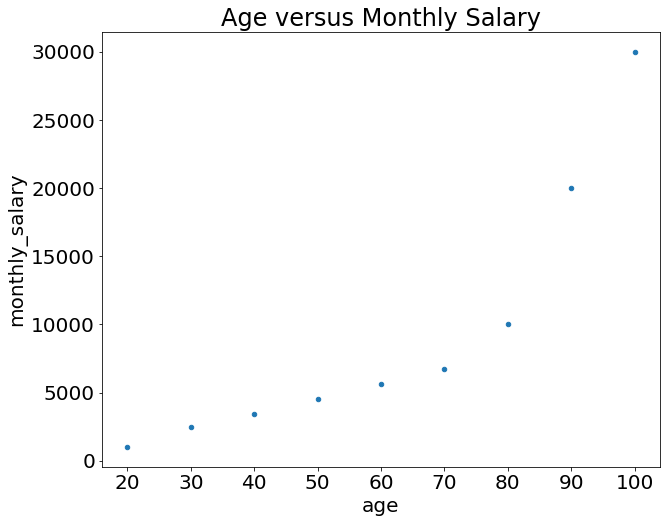

In [182]:
'''
Let's plot the relationship between age and monthly_salary.

All we need to do is call .plot() on members with some info about how to construct the plot:
'''

members.plot(kind='scatter', x='age', y='monthly_salary', title='Age versus Monthly Salary')

<AxesSubplot:title={'center':'Monthly Salary'}, ylabel='Frequency'>

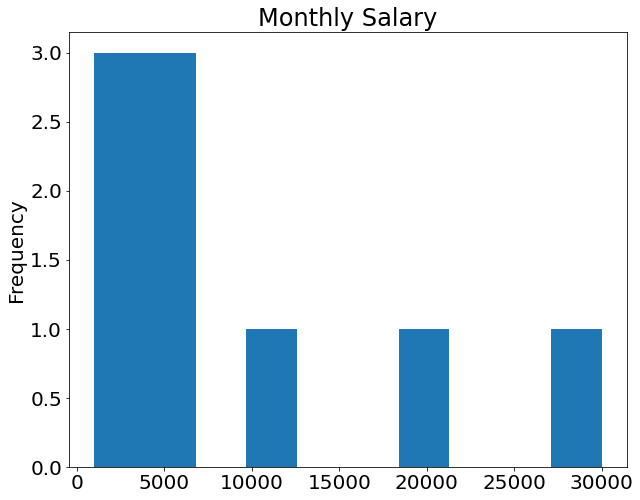

In [183]:
# If we want to plot a simple Histogram based on a single column, we can call plot on a column:

members['monthly_salary'].plot(kind='hist', title='Monthly Salary')

In [185]:
'''
Do you remember the .describe() example at the beginning of this tutorial?
Well, there's a graphical representation of the interquartile range, called the Boxplot.

Let's recall what describe() gives us on the monthly_salary column:
'''

members['monthly_salary'].describe()

count        9.000000
mean      9300.000000
std       9597.525723
min       1000.000000
25%       3400.000000
50%       5600.000000
75%      10000.000000
max      30000.000000
Name: monthly_salary, dtype: float64

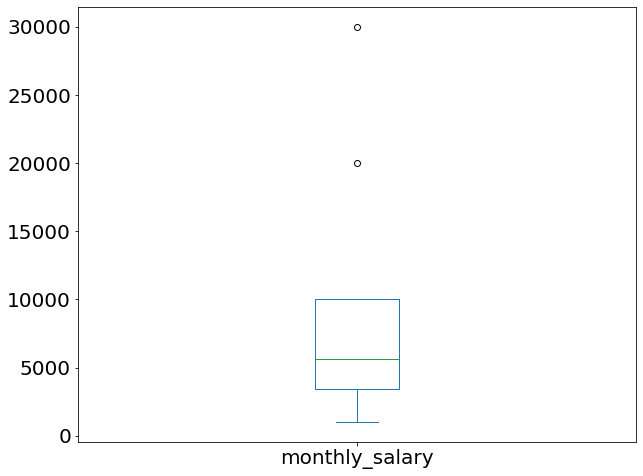

In [186]:
# Using a Boxplot we can visualize this data:
members['monthly_salary'].plot(kind="box");

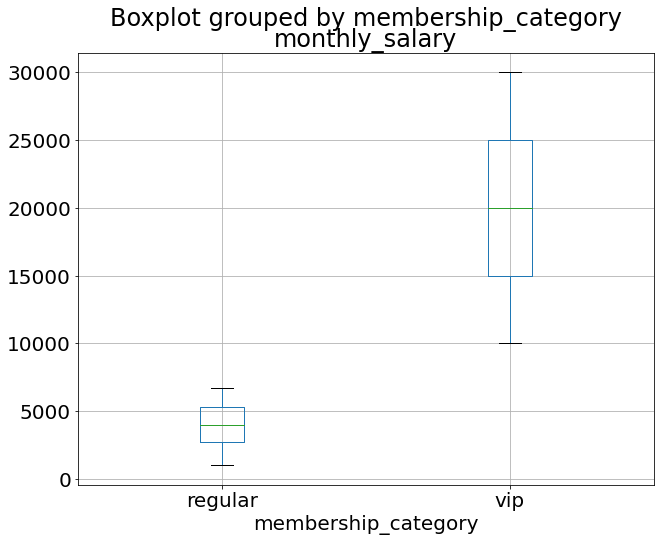

In [187]:
'''
By combining categorical and continuous data, we can create a Boxplot of
monthly_salary that is grouped by the Membership Category we created above:
'''
members.boxplot(column='monthly_salary', by='membership_category');